In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

In [ ]:
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data[['Close']]
    return stock_data

In [ ]:
def prepare_data(data, time_steps=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    x, y = [], []
    for i in range(time_steps, len(scaled_data)):
        x.append(scaled_data[i-time_steps:i, 0])
        y.append(scaled_data[i, 0])

    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y, scaler

In [ ]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Prediction for 1 output value (next closing price)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [14]:
def plot_predictions(real_prices, predicted_prices, title="Stock Price Prediction"):
    plt.figure(figsize=(12, 6))
    plt.plot(real_prices, color="blue", label="Actual Prices")
    plt.plot(predicted_prices, color="red", label="Predicted Prices")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()


In [16]:
if __name__ == "__main__":
    # Parameters
    ticker = "AAPL"  # Replace with desired stock ticker
    start_date = "2015-01-01"
    end_date = "2022-12-31"
    time_steps = 60
    epochs = 50
    batch_size = 32

In [22]:
stock_data = download_stock_data(ticker, start_date, end_date)
print("Downloaded stock data:")
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Downloaded stock data:
Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.347174
2015-01-05  23.661272
2015-01-06  23.663500
2015-01-07  23.995314
2015-01-08  24.917274


In [28]:
train_size = int(len(stock_data) * 0.8)
train_data = stock_data[:train_size]
test_data = stock_data[train_size:]
x_train, y_train, scaler = prepare_data(train_data.values, time_steps)
x_test, y_test, _ = prepare_data(test_data.values, time_steps)

In [32]:
model = build_model((x_train.shape[1], 1))
model.summary()
print("\nTraining the model...")
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

C:\Users\aadhi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.0430
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0031
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0019
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0019
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0019
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.0018
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0022
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0017
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0018
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0020
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0015
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0016
Epoch 13/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0018
Epoch 14/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0011
Epoch 15/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
real_prices = test_data.values[time_steps:]
print("\nMean Squared Error:", mean_squared_error(real_prices, predictions))

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step

Mean Squared Error: 4681.940906220746


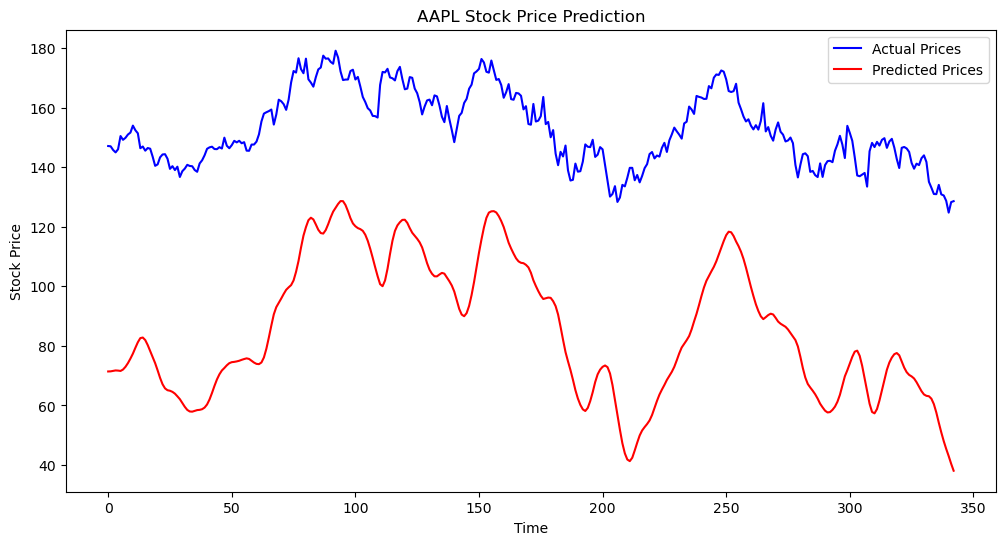

In [38]:
 plot_predictions(real_prices, predictions, title=f"{ticker} Stock Price Prediction")